### UK Bank Customers - 2015 (Kaggle Dataset)


In [1]:
#Import necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')


%matplotlib inline 

In [2]:
#Import dataset 

df = pd.read_csv('P6-UK-Bank-Customers.csv')

In [3]:
#Check dataset

df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [4]:
#Check data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
Customer ID           4014 non-null int64
Name                  4014 non-null object
Surname               4014 non-null object
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Date Joined           4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [5]:
#check for null values 

df.isna().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

In [64]:
#What is the median age of depositors

df['Age'].median()

37.0

In [6]:
#Convert Date joined column to DateTime 

df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [7]:
#Show the region with the most balance 

df.groupby(df['Region'])['Balance'].sum().sort_values(ascending=False)


Region
England             84833397.00
Scotland            44410730.72
Wales               22042829.26
Northern Ireland     8335566.39
Name: Balance, dtype: float64

Text(0, 0.5, 'Total Balance')

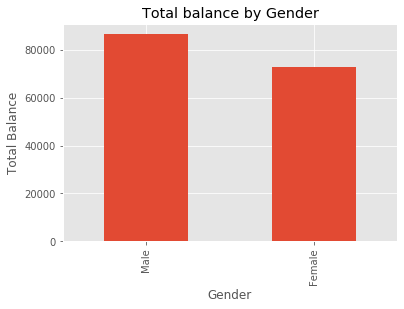

In [78]:
#What gender has the most balance 

df.groupby(df['Gender'])['Balance'].sum().sort_values(ascending = False).plot(kind ="bar")

plt.title('Total balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Balance')

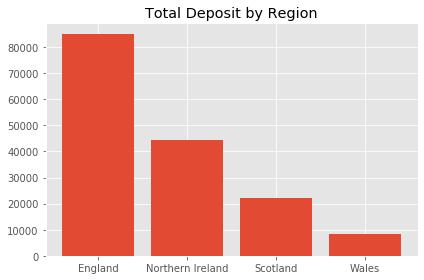

In [9]:
#Visualize the region with their respective balances

#Convert Balance column to thosands
df['Balance'] = df['Balance'] / 1000

a = list(df.groupby(df['Region'])['Balance'].sum().index)
b = list(df.groupby(df['Region'])['Balance'].sum().sort_values(ascending=False).values)


plt.bar(a,b)

plt.title("Total Deposit by Region")

plt.tight_layout()

In [38]:
#Show the total deposit by age 

df.groupby(df['Age'])['Balance'].sum()



Age
15      12.54821
17     181.86905
18    1008.16736
19     739.45783
20     659.87871
21    1067.86163
22    1244.57473
23    1831.48272
24    2337.94185
25    2583.74177
26    2915.78402
27    3377.25728
28    4699.37855
29    5198.09016
30    5021.56207
31    6707.12447
32    6238.69005
33    6641.98612
34    7988.73379
35    6377.52170
36    7368.28496
37    6510.79451
38    6348.72462
39    5487.04639
40    4796.01391
41    5192.84371
42    5149.22745
43    4651.52223
44    3979.31619
45    4587.08183
46    3924.52257
47    3531.25103
48    3039.81075
49    2894.72998
50    2572.07134
51    2731.16040
52    3267.81885
53    2685.49621
54    1884.97019
55    1808.58704
56    1513.40278
57    1737.21444
58    2053.16072
59    1211.86639
60    1270.29568
61    1084.71727
62     544.34870
63     338.30177
64     624.28939
Name: Balance, dtype: float64

Text(0, 0.5, 'Total Depositors')

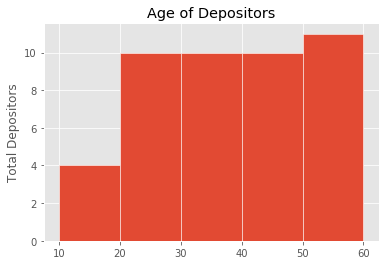

In [58]:
#Plot a histogram showing the distribution of balance across different age groups
x = df.groupby(df['Age'])['Balance'].sum().index
y = df.groupby(df['Age'])['Balance'].sum().values

bins = [10, 20, 30, 40, 50, 60]

plt.hist(x, bins = bins, edgecolor = 'white')


plt.title('Age of Depositors')
plt.ylabel('Total Depositors')

Text(0, 0.5, 'Number of depositors')

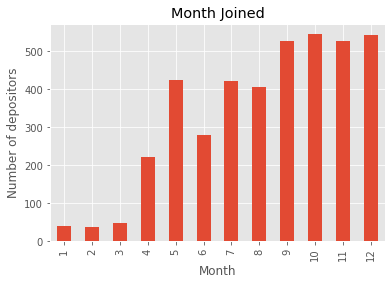

In [73]:
#What month did most people join the bank 

#Extract the month 
df["Month Joined"] =pd.DatetimeIndex(df["Date Joined"]).month

#group depositors by month 
df.groupby(df['Month Joined'])["Name"].count().plot(kind = "bar")

plt.title('Month Joined')
plt.xlabel('Month')
plt.ylabel('Number of depositors')